In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense , InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy,TruePositives,TrueNegatives,FalsePositives,FalseNegatives
from sklearn.metrics import confusion_matrix,roc_curve

In [8]:
a=np.random.randint(2,5,1000)
df=pd.DataFrame(a)
df.to_csv("data.csv")
df=pd.read_csv("data.csv")
df.head()
len(a)

1000

In [10]:

ram=[2,4,8,16,32]
storage=[8, 16,32,64,128,256,512]
battery=np.linspace(2000,8000,13)
#company=["Samsung","Oppo","Vivo","Apple","Mi"]
company=[1,2,3,4,5]

df["RAM"]=np.random.choice(ram,1000)
df["STORAGE"]=np.random.choice(storage,1000)
df["BATTRY"]=np.random.choice(battery,1000)
df["COMPANY"]=np.random.choice(company,1000)

In [11]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.drop("0",axis=1,inplace=True)

In [15]:
price=np.random.randint(8500,25000,(1000))

for i in range(1000):
  if df["COMPANY"][i]==5:
     price[i]+=50000

  if df["STORAGE"][i]==512:
     price[i]+=15000

  if df["RAM"][i] ==32:
     price[i]+=15000

  if df["BATTRY"][i]==8000.0:
     price[i]+=20000

  price[i]/=100
  price[i]*=100

df["PRICE"]=price

df.head()

,RAM,STORAGE,BATTRY,COMPANY,PRICE
0,16,8,6000.0,5,62000
1,2,512,2000.0,1,27000
2,16,32,7000.0,2,14500
3,4,256,5000.0,2,19900
4,2,128,6000.0,2,12500


In [16]:
X=df.drop("PRICE",axis=1)
Y=df["PRICE"]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)
print(f"Xtrain={len(xtrain)}")

Xtrain=700


In [17]:
metrics=[Accuracy(),TruePositives(),TrueNegatives(), FalsePositives(), FalseNegatives()]

In [18]:
model=tf.keras.Sequential([
InputLayer(input_shape=(4,)),
Dense(128,activation="relu"),
Dense(64, activation="relu"),
Dense(10, activation="relu"),
Dense(1, activation="relu")

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9557 (37.33 KB)
Trainable params: 9557 (37.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


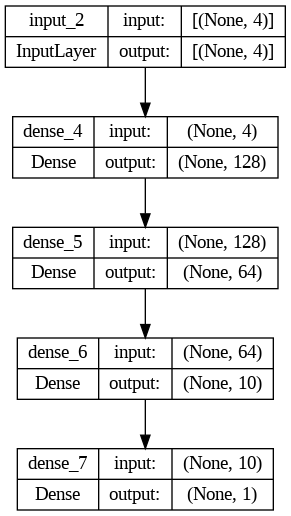

In [26]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [20]:
model.compile(optimizer=Adam(),loss=MeanSquaredError(),metrics=metrics)

Hist=model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 2ms/step - loss: 1485426304.0000 - accuracy: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 1400.0000
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 1485426304.0000 - accuracy: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 700.0000
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 1485426304.0000 - accuracy: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 700.0000
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 1485426304.0000 - accuracy: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 700.0000
Epoch 5/10
22/22 [==============================] - 0s 13ms/step - loss: 1485426304.0000 - 

In [26]:
a=int(input("Enter Ram : "))
b=int(input("Enter storage: "))
c=int(input("Enter Battery: "))
d=int(input("Enter Company: "))

p=int(model.predict([[a,b,c,d]]))
print(f"Estimate price for your mobile is {p}")

KeyboardInterrupt: ignored

In [5]:
ypred=model.predict(xtest)
len(ypred)
model.evaluate(xtest,ytest)

NameError: ignored

In [28]:
ypred[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [4]:
ytest

NameError: ignored

In [3]:
cm=confusion_matrix(ytest,ypred)

NameError: ignored